# Author: Husam Abdelrahim

## Assignment Week 12 

## New York Times API - Article Search

## Introduction

In today work in this document that I will be providing is that we will see how an implementation of the interface that is basically meant to work with the New York Time API. As we know that the New York Times does provide a very rich detailed information in regarding the APIs and basically what it does is that it will allow the developers to have access to certain contents for example to give you an idea developers would have access to articles search API, reviews, books, which is a good handful of information that could be used and could be implementend.

So the the reason why this implementation is really important is because:

1. The ability to connect with the NYT API 
2. It's able to retrieive the articles in a JSON format
3. It can transform the data in the pandas DF and this is good for the analysis
4. The visualization results for better understanding see hte time line of the publish and the plot that is being shown in the graph.

So overall what does the implementation does is that it basically doe sserve as a foundation especially for data analyst, and basically anything that would eventually require sentiment analysis, having an understanding of the trend identification, and the content from the reputable sources.

## Step 1: Officially setting up the environment and the implementations 

So the first thing we are going to do is basically setup the libaries that we are going ot use and how it's going to be very necessary.

**requests**: So starting of with the requests basically what it does is that it's used for the HTTP and the requests to the New York Times API

**pandas**: Pandas is going to be used basucled for manipualtion of the data and since this is requried for us to make DataFrames

**matplotloib.pyplot**: This is going to be used at the end to display a visualizations and understand a pattern of the release/publications of the artic;lle

So overall these libaries are very important especially **requests** and **pandas** because those two core libaries are very important to achieve our goal in this work but **matplotlib** is optional but will beu sed as it's always nice to presnet some sort of visualization in the work

In [89]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


# Step 2: The API Connection 

In this second step what will be occured is that will now establish a connection and define **"getting_the_nyt_article"**

To understand what is going on in this section there is many things that is going on but it'actually fairly simple to explain

1. What it's going to do is basically accept the parameters of the API key, there is going to be a search query but this is actually going to be optional, and the amount of the result that is return

2. Im are going to make constructs to the API url and the parameter dictionary as well

3. This is going to be useful as it's going to be making the http request with the NYT API

4. This is actually going to be checking for a successful responese and that status codde would usally be = a status code 200

5. What is also being occured here is that it's going to parse with the JSON and would response to the python dictionary 

6. It's going to be extracting the artile documents that is going to be coming from the response

7. So the list of the articles that will be output it will be coverted into a pandas DataFrame.

8. It's going to be returning to the dataframe to continue for the further processing

 what is going here is that the functuion has includes an error that would be able to handle and be able to catch any process of the API that can turn out to be a failure and the API response and it also provides an information of the error messages that is provided. 

 But overall what this function does is that it's basically serves a bridge and that is between the python application and the NYT API and this is acutally designed giving the users to search for certain queries if requires and there will be a limit amount of numbers of the resuts that is being returned

 The function first what it will do is that it will construct the API to the URL endpoint and it's going to be building a parameter that will include an API key which is an essential, and the results will be set by the sorted newest, so let's say if you add to the search query like politics or technology it should respond with the proper and add to the parameters that is being presented

 So after making the requesting using the **requests** the next thing is that the fuction it will basically see if there is any error, it's meant to check for errors and make sure that the API does respond with success, this apporach does indeed prvent the application from any possiblity of crashing NYT API is unavaiialbe or even returning an error as as well. But once there is a successful retrieval, its going to be extracting the article doucments that is foind in **response docs** which is the path of JSON. The extraction basically gets to use the **get()** and with the default values it's to prevent errors if there is a certain strcutre that isn't presented. 

 The last step, the function what it does is that it transforms the list of the article documents into a Pandas DataFrame, this is a powerful data strucutre and we can filte and it's can be used for better analysis and this transformation is very critical which transfer from a raw API to a structure and what this does is better analysis, visualization, and could be provided the user interface.

In [90]:
def getting_the_nyt_article(api_key, query =None , max_results=10):
    """"what we are going to be doing is getting the NYT articles and basically use Search API since it is active"""

    # past API I was utilizing got shut down therefore I am switching article 

    # This right here is going to be the API endpoint 
    base_url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"

    if query:
        url = f"{base_url}?q={query}&sort=newest&api-key={api_key}"
    else:
        url = f"{base_url}?sort=newest&api-key={api_key}"

    # in this section what I will be doing is that I am going to be setting up the parameters 

    params = {

        "api-key": api_key,
        "sort": "newest"

    }

    # Im gonna be adding query parameter 

    if query:
        params['q'] = query

    print(f"Please initate a request to: {url}")
    print(f"Parameters: {params}")

    response = requests.get(url, params = params)

    if response.status_code != 200:
        print(f"Error: {response.status_code}") 
        print(f"The response that the content that is being provided : {response.text}")
        return None
    
    data = response.json()

    # So what is going to be happening here is that the search API return will result in the docs so basically it's going to be inside of the response

    articles = data.get('response', {}).get('docs', [])[:max_results]

    # so now what I am going to do is covert it into a DataFrame!

    articles_df = pd.DataFrame(articles)

    return articles_df


        

# Step 3: The making of the API request!

For the thrid step we are going to use the function with an API key and tehe query:

So what is going to happen he is that we are going to execute the API request with

- our personal API that is being provided by the New York Times

- There is going to be a search query that is related with "technology"

- and there is going to be a limit and a defualt maximum of 10 results 

This is the simplicity of what the it's going to gather but it would need access to our api key and with the query it's going to help us to narrow down our search to just technology 

In [91]:
api_key = "dh9SATTI7pdP3fVCugPsz1aNtRb62XVo"
articles = getting_the_nyt_article(api_key, query="technology")

Please initate a request to: https://api.nytimes.com/svc/search/v2/articlesearch.json?q=technology&sort=newest&api-key=dh9SATTI7pdP3fVCugPsz1aNtRb62XVo
Parameters: {'api-key': 'dh9SATTI7pdP3fVCugPsz1aNtRb62XVo', 'sort': 'newest', 'q': 'technology'}


# Step 4: The process and displaying the resutls 

So after obtaining the articles what is going to be displayed here is that it's going to be in a readable format and it also provides a detailed information.

To cover with what is going on is that this section will cover:

1. This is basically going to be extracting the headline from the nested headline structure of the dictionary that is being presented 

2. This is going to convert the publication date of the article string to a much more date time format and this is going to be used for the display purposes

3. This is going to be slecting the most critical information for the column that is being displayed

4. This is going to be dsipalying each article that will be having the section and the headline, the url and the date of course that is going to be provided 

the output that is going to be presented, readable format, the presentation of this is going to be clean and with having proper dividers it will make it easier to obtain the information that is provided in this work. 

This portion is very essential because here what is going on is that we are turning a RAW API data and making it more readable, making it easier to understand the information and what the NYT API returns is actually pretty complex and not really user friendly to consume, this code is very challenging and that by the idea of extracting and proper formating we can really display key information. So to go more in depth I was more intersting the headline so we have to use pandas and by using the **apply()** method with lambda it going to extract the value and now this appraoch that we are using is more user firendly and and containing properly headline. Next thing what the code does is that it addresses is that it formats the dates of the publication so the API usually contains the timestamps but in a format that isn't really readable so by doing this it's basically converting these strings to be more readable and now we use the method of **strftime()** and thisis going to be more cleaner and presentable. 

The code what it does is that slections a more relevant information to display so it won't overwhelm the user with unncessary information and again it fouces on key information like the publication date, and the newspaper, section, and the headline. This is going to be very important for presenting a clean data and finally what hte code is it follows a loop that presents on each of the artilce and the format and with this information this is going to be very easy to comprehend with what is going on with the work. So when we have the raw api data and reshaping it into a format that tells a clear store, it enables that user to be understand with what is going on and possiblity.

In [92]:
# What is gonna be done here is that I will be display the articles which will have the detail 
if articles is not None and not articles.empty:
    # now what I will be dExtract headline main from the headline dictionary
    if 'headline' in articles.columns:
        articles['headline_main'] = articles['headline'].apply(lambda x: x.get('main') if isinstance(x, dict) else None)
    
    # we are gonna make this more readable and more established to go through and interacable 
    if 'pub_date' in articles.columns:
        articles['pub_date'] = pd.to_datetime(articles['pub_date']).dt.strftime('%Y-%m-%d %H:%M')
    
    # this is basically gonna select the most informative information
    display_columns = ['pub_date', 'section_name', 'headline_main', 'web_url']
    display_columns = [col for col in display_columns if col in articles.columns]
    
    # we are going to present a nice table that is formatted 
    print(f"Found {len(articles)} articles")
    print("ARTICLE SUMMARIES:")
    print("-" * 80)
    
    # This is gonna loop through the aticles and be presentable in more nice manner Loop through articles to format them nicely
    for i, (_, article) in enumerate(articles[display_columns].iterrows()):
        print(f"Article {i+1}:")
        print(f"  Date: {article.get('pub_date', 'N/A')}")
        print(f"  Section: {article.get('section_name', 'N/A')}")
        print(f"  Headline: {article.get('headline_main', 'N/A')}")
        print(f"  URL: {article.get('web_url', 'N/A')}")
        print("-" * 80)


Found 10 articles
ARTICLE SUMMARIES:
--------------------------------------------------------------------------------
Article 1:
  Date: 2025-04-12 01:17
  Section: New York
  Headline: Judge Says One DOGE Member Can Access Sensitive Treasury Dept. Data
  URL: https://www.nytimes.com/2025/04/11/nyregion/doge-treasury-lawsuit.html
--------------------------------------------------------------------------------
Article 2:
  Date: 2025-04-11 20:13
  Section: Business
  Headline: Five More Big Law Firms Reach Deals With Trump
  URL: https://www.nytimes.com/2025/04/11/business/trump-law-firms-kirkland-ellis-latham-watkins.html
--------------------------------------------------------------------------------
Article 3:
  Date: 2025-04-11 19:53
  Section: New York
  Headline: Investigation Into Helicopter Crash Just Getting Underway
  URL: https://www.nytimes.com/2025/04/11/nyregion/helicopter-crash-investigation.html
----------------------------------------------------------------------------

# Step 5: Visualization of the data

Now for the final step we are going to be creating visualization and basically jsut be able to show a proper time that is occuring.

1. THis is going to ensure the publication dates are in in the right datetime format 

2. It's going to be sort the article by the date

3. We are going to be creating a scatter plot so we will see the publication dates, the articles, and the blue dotes that represnts the article.

4. We are going to be adding a headline that is going to be presented in the text label and have it presented in the next point

5. it's going to format the plot with title the lables and the grid lines that is gbeing presented

6. Adjusting the layout for having a proper viewing

So what the visualization does for us is that it's going show atimeline of the articles and they are sorted and it's and easy to way to understand the pattenrs that we are dealing with.

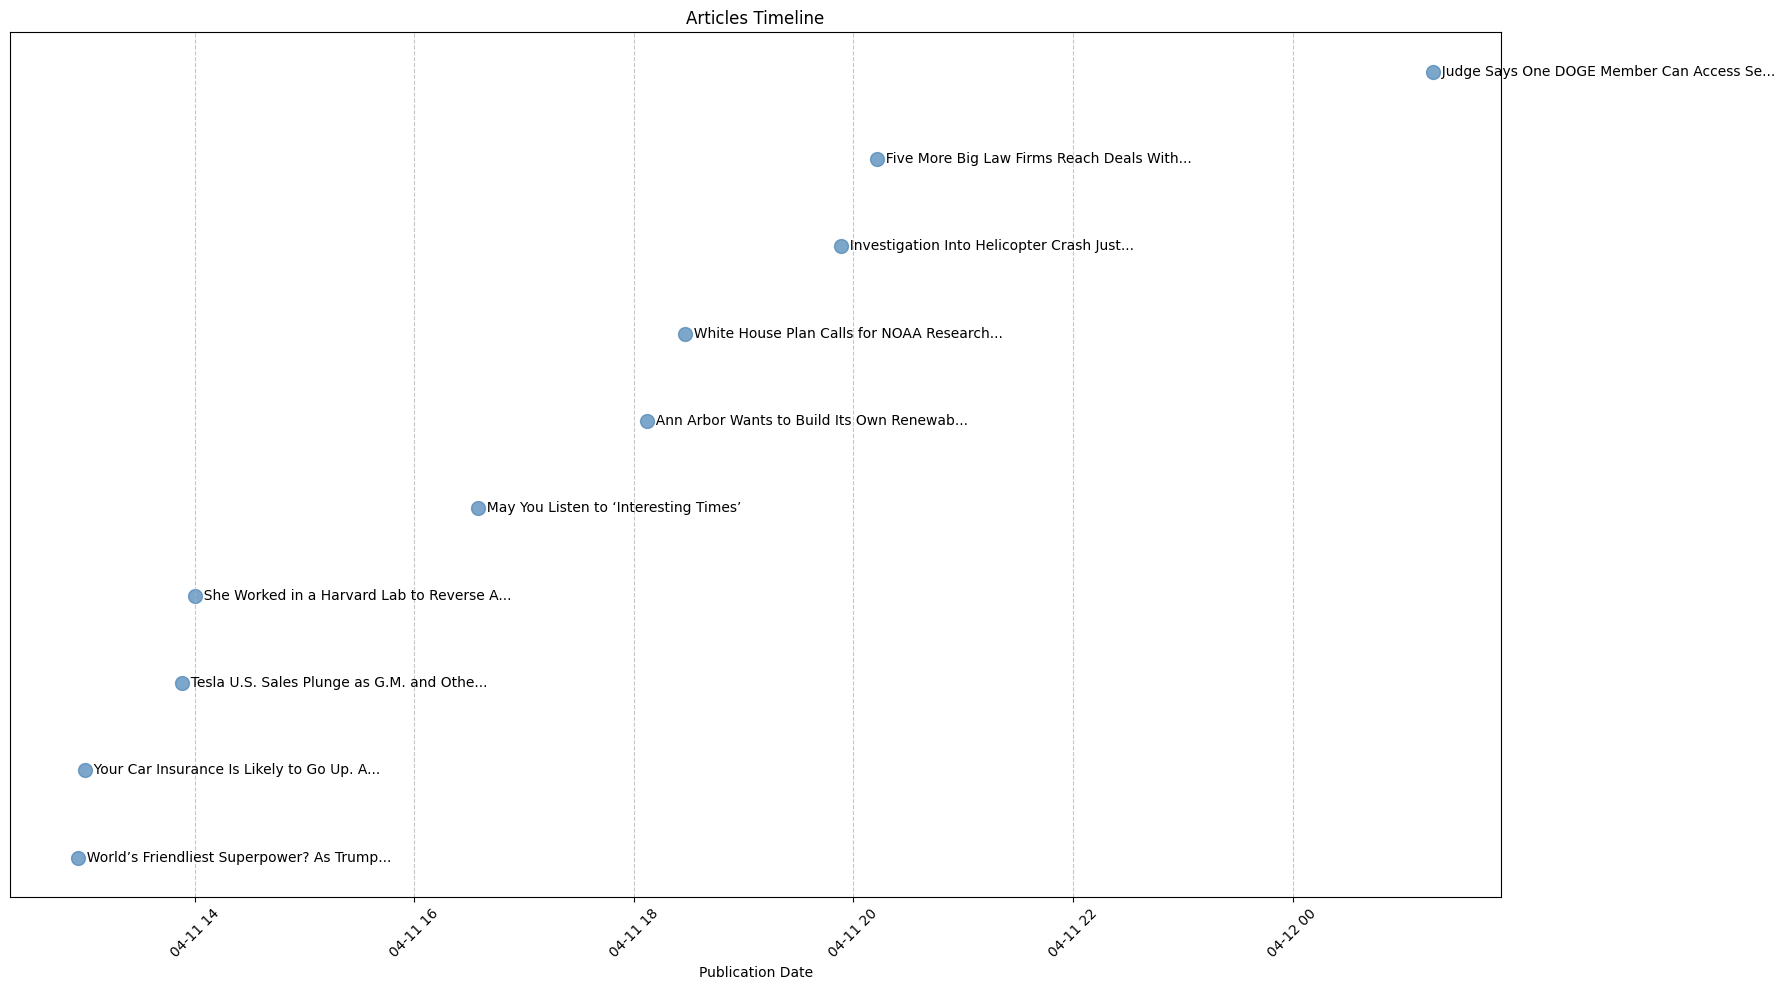

In [93]:
# what we are going to be doing here is that we are goint to be making a scatter plot and this scatter plot is basically gonna show the publication with the date

# We are going to be creating a dot plot that comes with the proper dates 
if articles is not None and not articles.empty and 'pub_date' in articles.columns:
    # we are going to covert the pub date to the datetime 
    articles['pub_date'] = pd.to_datetime(articles['pub_date'])
    
    # so now we are going to article by the dates 
    articles_sorted = articles.sort_values('pub_date')
    
    # now it's time to make a figure 
    plt.figure(figsize=(18, 10))
    
    # we are going to make this scatter plot
    # now the scatter plot is basically is gonna display the articles that is sorted by the pub date 
    plt.scatter(articles_sorted['pub_date'], 
                range(len(articles_sorted)),  
                s=100,                        
                color='steelblue',           
                alpha=0.7)
    
    # we are gonna add the headlines which is going to be our labels
    if 'headline_main' in articles_sorted.columns:
        for i, (_, article) in enumerate(articles_sorted.iterrows()):
            plt.text(article['pub_date'], i, 
                     f"  {article['headline_main'][:40]}{'...' if len(article['headline_main']) > 40 else ''}", 
                     verticalalignment='center')
    
    # next we will be formatting the plot 
    plt.yticks([])  
    plt.xticks(rotation=45)
    plt.title("Articles Timeline")
    plt.xlabel("Publication Date")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    # we are going to be adjusting the layout and be able to make the room for the text 
    plt.tight_layout()
    plt.show()


# Understanding the technical analysis

## The Data Strcuture

The NYT API what it does is that it returns data in a JSON strcutre and there are a couple elemnts that is include 

1. **pub_date**: This will display the publication date and the time of the article 
2. **section_name**: Over here its going to show a section of the news paper and where has the article appeared
3. **headline**: A dictionary that is nested and contains a headline text
4. **web_url**: The URL which accesses the full article online of course with a connection

The only reason why we use pandas **apply** method is because to carefully extract information esepcially for the main headline text

# Error Handling

So with this implementation it has a basic error:

- It's usually checking for the sucessful API responses, again this is a status of 200

- Next we are going to be displaying the errorm essages if the API requests tend to fail

- We are going to be checking for the existnece before trying to access the data information 

- Providing values if the data has gone missing

# Conclusion 

So with the implementationa it's very useful and it's successfuly makes an interface to the NYT (New York Times) Article search so this will basically give the users the persmission for the articles and be able to get infomation that is actually relevant, so the idea of taking the data and making it into a structured format will make it more usable, without proper error handling the code is pretty robust

The result system what provides is basically:

- News and the aggregation
- The media monitroing
- The content research and the discovery that is occuring.

 # Future Implementation and the enhancements that it can use

 1. **Advanced search options** : We are going to be implementeing a search parameters that could really enhance the search like having:
    - Date range filtering
    - section filter
    - Author filter
    
2. **Enchanced storage**: So having a proper data base in the back can really be used to store articles and have it perserved for analytical purposes

3. **Interactive presentation web**: Having an interactive web with proper search and visualization for presentation can really make it easier for the use to utilize

4. **Monitoring** : Having an active monitoring system for new topics and articles that the user could be interesting in

5. **An enhanced visualizations**: Adding elements like better visualizations will have the user to interact with the service more and easier to use, an headline that is clickable and will lead to opening an URL article.

So these enhnacements can really make the service much better to use. 